In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv("Usa Housing Dataset.csv")

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

In [4]:
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis=1)
df = df.dropna()
X = df.drop('price', axis=1)
y = df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print("RF MAE:", mean_absolute_error(y_test, rf_preds))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("RF R²:", r2_score(y_test, rf_preds))

RF MAE: 168120.4297469575
RF RMSE: 266305.6375159751
RF R²: 0.32352371343397446


In [7]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
tuned_preds = random_search.predict(X_test)
print("Tuned RF MAE:", mean_absolute_error(y_test, tuned_preds))
print("Tuned RF RMSE:", np.sqrt(mean_squared_error(y_test, tuned_preds)))
print("Tuned RF R²:", r2_score(y_test, tuned_preds))

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None}
Tuned RF MAE: 169239.31542208933
Tuned RF RMSE: 269224.1183132884
Tuned RF R²: 0.30861526994022237


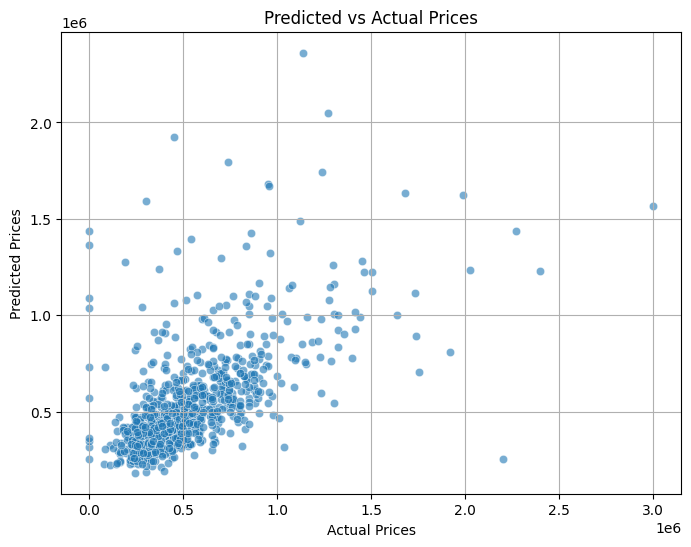

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=tuned_preds, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.grid(True)
plt.show()